Zalecamy nie czytać notatników na githubie, ze względu na źle wyświetlające się wizualizacje i brak możliwości uruchamiania kodu. Polecamy otworzyć notatnik w google colab.

#**Olimpiada AI - kurs wprowadzający 2025 - Wykład 001C**
"Wstęp do Pythona - praktyczny notebook"


## 1. Szybkie przypomnienie Pythona

In [ ]:
# Deklaracja zmiennej
x = 5

In [ ]:
# Instrukcja print
print("Wartość zmiennej x wynosi:", x)

Wartość zmiennej x wynosi: 5


In [ ]:
# Pętla
for i in range(10):
    print("Iteracja:", i)

Iteracja: 0
Iteracja: 1
Iteracja: 2
Iteracja: 3
Iteracja: 4
Iteracja: 5
Iteracja: 6
Iteracja: 7
Iteracja: 8
Iteracja: 9


In [ ]:
# Instrukcja warunkowa
if x % 2 == 1:
    print(f"x={x} jest nieparzysta")
else:
    print(f"x={x} jest parzysta")

x=5 jest nieparzysta


In [ ]:
# Listy
lista = [1, 2, 3, 4, 5, "abc"]
print("Pierwszy element listy:", lista[0])

# append, insert, extend, -1, 1:, :-1, ::-1, remove, pop

Pierwszy element listy: 1


In [ ]:
# Słowniki
slownik = {"klucz1": "wartość1", "klucz2": "wartość2"}
print("Wartość dla 'klucz1' w słowniku:", slownik["klucz1"])

Wartość dla 'klucz1' w słowniku: wartość1


In [ ]:
def funkcja(x, y):
  # ...
  return x + y


print("Wynik to", funkcja(3, 4))

Wynik to 7


### Demo: Odbijająca się piłka
Symulacja toru ruchu piłki odbijającej się o powierzchnię, uwzględniając opór powietrza.

#### Pomocniczy kod animacji

In [ ]:
#@title Kod pomocniczy. Nie czytaj, zwiń komórkę.

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


def animacja_pilki(pozycje, wysokosc_obrazka=200, szerokosc_obrazka=200):
    def rysuj_kropke(axes, pozycja_y):
        axes.clear()
        axes.set_xlim(0, szerokosc_obrazka)
        axes.set_ylim(0, wysokosc_obrazka)
        axes.plot(szerokosc_obrazka // 2, pozycja_y, 'wo', markersize=10)
        axes.set_xticks([])
        axes.set_yticks([])
        axes.set_facecolor("black")

    fig, ax = plt.subplots()
    ani = FuncAnimation(fig, lambda i: rysuj_kropke(ax, pozycje[i]), frames=len(pozycje), interval=50)
    plt.close(fig)
    return ani


#### Kod symulacji

In [ ]:
def symulacja_pilki(grawitacja, opor, wysokosc_poczatkowa, kroki, czas):
    pozycje = []
    wysokosc = wysokosc_poczatkowa
    predkosc = 0
    czas_kroku = czas / kroki
    for i in range(kroki):
        predkosc -= grawitacja * czas_kroku
        predkosc *= (1 - opor)  # zmniejszenie prędkości o opór powietrza
        wysokosc += predkosc * czas_kroku

        if wysokosc <= 0:
            wysokosc = -wysokosc  # odbicie
            predkosc = -predkosc  # zmiana kierunku

        pozycje.append(wysokosc)

    return pozycje

In [ ]:
pozycje = symulacja_pilki(grawitacja=9.8, opor=0.01, wysokosc_poczatkowa=200, kroki=100, czas=15)
print("Pozycje piłki w czasie:", pozycje)

In [ ]:
from IPython.display import HTML
HTML(animacja_pilki(pozycje).to_jshtml())

## 2. Tensory

Zaglądamy do notebooka z wykładem "Wykład 001D", gdzie opisane są operacje wektorowe i numpy. Następnie operujemy na pobranym klipie wideo -- czterowymiarowym tensorze.

### Pomocniczy kod

In [ ]:
#@title Kod pomocniczy. Nie czytaj, zwiń komórkę.

from IPython.display import HTML
import matplotlib.pyplot as plt
import matplotlib.animation as animation


def wizualizacja_wideo(clip):
    fig, ax = plt.subplots()

    def update_frame(i):
        ax.clear()
        ax.imshow(clip[i])
        ax.set_title(f"Frame {i+1}")
        ax.axis('off')

    ani = animation.FuncAnimation(fig, update_frame, frames=clip.shape[0], interval=200)
    plt.close(fig)
    return ani

### Pobieranie klipu wideo

In [ ]:
import numpy as np

# Zdjęcia satelitarne Morza Aralskiego od 2000 do 2018 roku.
! gdown https://drive.google.com/uc?id=19bdIA_-ra_G5EGPuGr8NJ7hbPVZYdgkA

clip = np.load("aralsea.npy")
HTML(wizualizacja_wideo(clip).to_jshtml())

### Badanie i manipulacja tensora

In [ ]:
clip.shape

(19, 720, 720, 3)

In [ ]:
# Czas od tyłu

clip_back = clip[::-1]
HTML(wizualizacja_wideo(clip_back).to_jshtml())

In [ ]:
# Wycięcie fragmentu tensora

clip_crop = clip[:, 100:-100, 100:-100]
HTML(wizualizacja_wideo(clip_crop).to_jshtml())

In [ ]:
# Obrót o 90 stopni

# Okazuje się, że każdy obrót to złożenie dwóch symetrii osiowych :)

clip_rot = clip.transpose(0, 2, 1, 3)[:, :, ::-1]
HTML(wizualizacja_wideo(clip_rot).to_jshtml())

In [ ]:
# Wyciemnianie wideo

clip_dark = clip * np.linspace(1, 0, clip.shape[0])[:, None, None, None]
clip_dark = clip_dark.astype(int)
HTML(wizualizacja_wideo(clip_dark).to_jshtml())

## 3. Maski binarne i wizualizacja

W tej sekcji zbadamy, jak zmienia się proporcja koloru niebieskiego w każdej klatce. Użyjemy bardzo prostej metody stworzenia tzw. maski binarnej. Następnie stworzymy nasz pierwszy wykres.

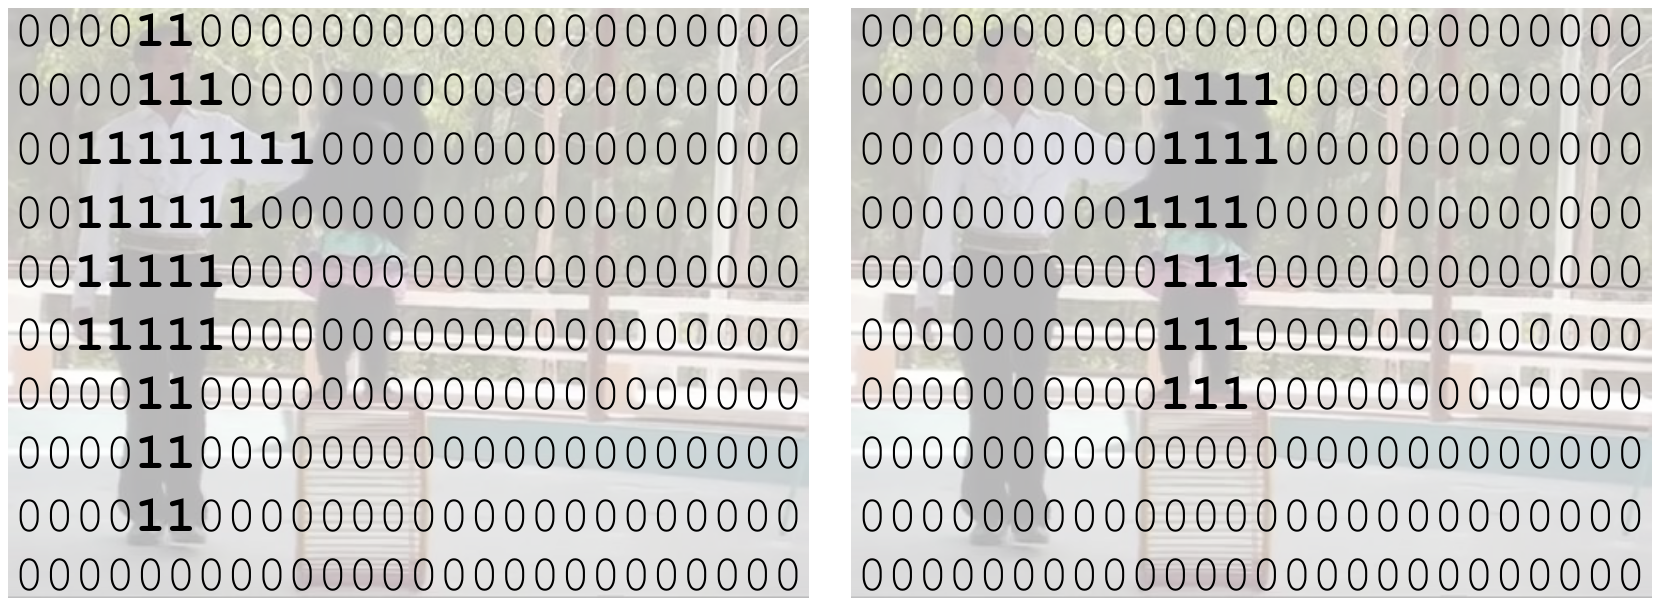

In [ ]:
# Natężenie koloru niebieskiego

blue_clip = clip[..., 2]  # Tutaj to to samo co clip[:, :, :, 2]
HTML(wizualizacja_wideo(blue_clip).to_jshtml())

In [ ]:
# Tworzymy maskę binarną wideo.
# Maska ma kształt (czas, wysokość, szerokość).
# Zauważ, że nie ma ona wymiaru odpowiadającego kanałom, tj. kolorom RGB.
# Maska ma wartość True dla pikseli, które mają wystarczająco silny niebieski kolor.

mask = clip[..., 2] < 50

HTML(wizualizacja_wideo(mask).to_jshtml())

In [ ]:
# Liczymy proporcję pikseli niebieskich dla każdej klatki wideo

proporcje_niebieskiego = np.mean(mask, axis=(1, 2))
print(proporcje_niebieskiego.shape)
print(proporcje_niebieskiego)

(19,)
[0.14129051 0.12559414 0.07492863 0.10304012 0.09649884 0.05050926
 0.05234375 0.05213349 0.02269097 0.04150656 0.06004051 0.04372685
 0.04963927 0.04596065 0.04497492 0.03264082 0.02944252 0.05032793
 0.01355324]


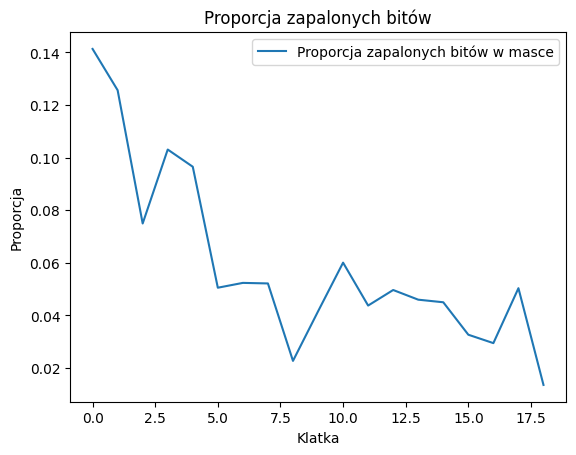

In [ ]:
# Wizualizujemy powyższe wyniki jako wykres

import matplotlib.pyplot as plt

plt.plot(proporcje_niebieskiego, label="Proporcja zapalonych bitów w masce")
plt.xlabel("Klatka")
plt.ylabel("Proporcja")
plt.title("Proporcja zapalonych bitów")
plt.legend()
plt.show()

Na osi X powyższego wykresu mamy numery klatek, odpowiadające kolejnym latom. Na osi Y znajduje się ułamek pikseli w klatce które mają dostatecznie duże natężenie koloru niebieskiego (interpretujemy tą liczbę jako przybliżenie proporcji powierzchni Morza Aralskiego do całej powierzchni widocznej na zdjęciu). Na wykresie widzimy trend malejący.